### Installation using conda for "quantstats" library
$ conda install -c ranaroussi quantstats

! pip install quantstats

### Import library and fetching data

In [1]:
%matplotlib inline
import quantstats as qs

import pandas as pd
import hvplot.pandas
import yfinance as yf
from dotenv import load_dotenv
import numpy as np

# extend pandas functionality with metrics, etc.
qs.extend_pandas()

### Visualize stock performance

In [2]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from panel.interact import interact

In [3]:
# Initialize the Panel Extensions (for Plotly)
import panel as pn
pn.extension("plotly")

In [4]:
from panel.interact import interact, interactive, fixed, interact_manual
from panel import widgets
from matplotlib.figure import Figure
from matplotlib.backends.backend_agg import FigureCanvas
pn.extension()

In [5]:
import pickle
with open("tickers.pickle", "rb") as f:
    # Get a list of all tickers
    ticker_list = pickle.load(f)

In [6]:
from tkinter import *

OPTIONS = ticker_list

master = Tk()

variable = StringVar(master)
variable.set(OPTIONS[0]) # default value

w = OptionMenu(master, variable, *OPTIONS)
w.pack()

def ok():
    my_ticker=variable.get()
    print("The selected ticker is: "+ my_ticker)
    
button = Button(master, text="OK", command=ok)
button.pack()

mainloop()

# Get the input from users
my_ticker=variable.get()
my_ticker

The selected ticker is: AAPL


'AAPL'

In [7]:
my_ticker

'AAPL'

In [8]:
def search(list, ticker):
    for i in range(len(list)):
        if list[i] == ticker:
            return True
    return False

ticker = my_ticker
if search(ticker_list, ticker):
    stock = yf.Ticker(ticker)
    hist = stock.history(period="5y")
    stock_df = pd.DataFrame()
    stock_df[ticker] = hist["Close"]
    last_closin_price=stock_df[ticker].tail(1).values.tolist()    
    
    print(f' {ticker} last stock close price is ${round(last_closin_price[0], 2)}')
else:
    print(f' {ticker} last stock close price is not available')

 AAPL last stock close price is $135.84


### Tab 1 Historical stock price visualization

In [9]:
# Define interactive stock price for specific ticker symbol- tab 1
def price_graph():
    window_size=['5y','10y', 'ytd','max', '1mo','3mo','6mo','1y','2y', ]

    def vizual(window_size,my_ticker):
        """ Return stock price grapgh for the last 5 years"""
        stock_visual = yf.Ticker(my_ticker)
        hist = stock_visual.history(period=window_size)

        # Create an empty DataFrame for closing prices
        data_stock = pd.DataFrame()

        # Fetch the closing prices
        data_stock[stock_visual] = hist["Close"]

        return data_stock.hvplot(title = "Stock performance over time")
        
    return (interact(vizual, my_ticker=ticker,window_size=window_size))
window_size=['5y','10y', 'ytd','max', '1mo','3mo','6mo','1y','2y', ]
interactive_period ="Please choose the desire period"
interact = pn.interact(price_graph, window_size= window_size)

In [10]:
import plotly.figure_factory as ff

In [11]:
# Define functions to display relevant information about the company

def display_info(ticker):
    Yahoo_ticker = yf.Ticker(ticker)
    # info table
    info=Yahoo_ticker.info
    # convert dict to dataframe
    info_df=pd.DataFrame(info.items(), columns=['Information', 'Value'])
    #reset index
    info_df=info_df.set_index("Information")
    # retrieve specific info we want to display
    info_display_df=info_df.loc[["dividendYield", "trailingAnnualDividendRate", "profitMargins","forwardEps", "52WeekChange", "fiftyTwoWeekHigh", "fiftyTwoWeekLow",
                                 "averageVolume10days", "exchange"
                                 
                                 
                                 ]]
    #index=['Dividend Yield', 'Profit Margins', '52 Week Change', "52 Week High", "52 Week Low","Forward EPS"]
    info_display_df=info_display_df.rename(index={
        "dividendYield":'Dividend Yield',
        "trailingAnnualDividendRate":"Trailing Annual Dividend Yield",
        "profitMargins": 'Profit Margins', 
        "forwardEps":"Forward EPS",
        "52WeekChange":'52 Week Change',
        "fiftyTwoWeekHigh": "52 Week High",
        "fiftyTwoWeekLow":"52 Week Low",
        
        "averageVolume10day":"Average Trading Volume 10 day",
        
        "exchange":"Exchange",
        
    })
    
    return info_display_df


def display_business_summary(ticker):
    Yahoo_ticker = yf.Ticker(ticker)
    Business_summary_text =  Yahoo_ticker.info["longBusinessSummary"]
    #full_text = '\n''\n'.join([sector_text, Industry_text,Business_summary_text ])
    return Business_summary_text

def display_industry_summary(ticker):
    Yahoo_ticker = yf.Ticker(ticker)
    sector_text =  Yahoo_ticker.info["sector"]
    Industry_text =  Yahoo_ticker.info["industry"] 
    return Industry_text

def display_sector_summary(ticker):
    Yahoo_ticker = yf.Ticker(ticker)
    sector_text =  Yahoo_ticker.info["sector"]
    
    return sector_text

### Tab 2 Return and volatility metrics

In [12]:
# Get benchmark data of S&P 500 and Nasdaq ^IXIC for previous 5 years
index_sp500_stock = yf.Ticker("^GSPC")
index_nasdaq_stock= yf.Ticker("^IXIC")
index_hist_sp500_stock = index_sp500_stock.history(period="5y")
index_hist_nasdaq_stock = index_nasdaq_stock.history(period="5y")

# Create an empty DataFrame for closing prices
index_df = pd.DataFrame()

# Fetch the closing prices
index_df["S&P500"] = index_hist_sp500_stock["Close"]
index_df["NASDAQ"] = index_hist_nasdaq_stock["Close"]
#Display 
#index_df.tail()

In [13]:
def daily_return_graph():
    # Combine 2 individual stock price and index benchmark dataframe
    df_daily = pd.concat([stock_df, index_df], axis = "columns",join = "inner")
    # Calculate Daily Returns
    daily_returns = df_daily.pct_change().dropna()
    daily_returns.head()
    
    
    # Calculate cumulative returns
    cum_returns = (1+ daily_returns).cumprod()
    return daily_returns.hvplot(title = "Daily return for ticker " + ticker)

In [14]:
def daily_cum_return_graph():
    
    # Combine 2 individual stock price and index benchmark dataframe
    df_daily = pd.concat([stock_df, index_df], axis = "columns",join = "inner")
    # Calculate Daily Returns
    daily_returns = df_daily.pct_change().dropna()
    
    # Calculate cumulative returns
    cum_returns = (1+ daily_returns).cumprod()
    return cum_returns.hvplot(title = "Cumulative return for ticker " + ticker,
                             attr_labels = True)

In [15]:
def sharpe_graph():
    
    # Combine 2 individual stock price and index benchmark dataframe
    df_daily = pd.concat([stock_df, index_df], axis = "columns",join = "inner")
    # Calculate Daily Returns
    daily_returns = df_daily.pct_change().dropna()
    
    # Calculate sharpe ratio
    # Annualized Sharpe Ratios
    sharpe_ratios = daily_returns.mean()*252/(df_daily.std()*np.sqrt(252))
    # In percentage
    sharpe_ratios= sharpe_ratios*100
    # Visualize the sharpe ratios as a bar plot
    return sharpe_ratios.hvplot(title = "Sharpe ratios for ticker " + ticker + " and the benchmark",
                                kind = "bar",
                                hover_color = "orange",
                                 attr_labels = True)

In [16]:
# Define rolling standard deviation for specific ticker symbol- tab 2
def rolling_visual(window_size):
    """ Return rolling standard deviation grapgh for periods"""
    # Combine 2 individual stock price and index benchmark dataframe
    df_daily = pd.concat([stock_df, index_df], axis = "columns",join = "inner")
    # Calculate Daily Returns
    daily_returns = df_daily.pct_change().dropna()
    
    # Calculate the rolling standard deviation for investment using a specified window
    rolloing_std_df= daily_returns.rolling(window = window_size).std().dropna()
    rolloing_std_df=(rolloing_std_df*100).round(1)
    
    return rolloing_std_df.hvplot(title = "Rolling standard deviation for ticker " + ticker + " in a "+ str(window_size) +"-day window",
                         attr_labels = True,
                        ylabel= "in %"
                           )
        

In [17]:
# Define rolling ewm for specific ticker symbol- tab 2
def rolling_visual_ewm(window_size):
    """ Return rolling standard deviation graph for periods"""
    # Combine 2 individual stock price and index benchmark dataframe
    df_daily = pd.concat([stock_df, index_df], axis = "columns",join = "inner")
    # Calculate Daily Returns
    daily_returns = df_daily.pct_change().dropna()
    
    # Calculate the rolling ewm for investment using a specified window
    df_daily_ewm = daily_returns.ewm(halflife =window_size).std().dropna()
    df_daily_ewm=(df_daily_ewm*100).round(1)
    
    return df_daily_ewm.hvplot(title = "Rolling standard deviation for ticker " + ticker + " in a "+ str(window_size) +"-day window",
                         attr_labels = True,
                        ylabel= "in %"
                           )

### Tab 3 Algo Trading Strategy - exit and entry points

In [18]:
# Current close price dataframe
stock_df.head()

AAPL
Date                 
2016-01-21  22.304800
2016-01-22  23.490686
2016-01-25  23.032082
2016-01-26  23.159468
2016-01-27  21.637739

#### Entry/Exit Signals Strategy

In [19]:
# Set the short window and long windows
short_window = 50
long_window = 100

# Generate the short and long moving averages (50 and 100 days, respectively)
stock_df["SMA50"] = stock_df[ticker].rolling(window=short_window).mean()
stock_df["SMA100"] = stock_df[ticker].rolling(window=long_window).mean()

# Initialize the new `Signal` column
stock_df["Signal"] = 0.0

# Generate the trading signal 0 or 1,
# where 0 is when the SMA50 is under the SMA100, and
# where 1 is when the SMA50 is higher (or crosses over) the SMA100
stock_df["Signal"][short_window:] = np.where(
    stock_df["SMA50"][short_window:] < stock_df["SMA100"][short_window:], 1.0, 0.0
)

# Calculate the points in time at which a position should be taken, 1 or -1
stock_df["Entry/Exit"] = stock_df["Signal"].diff()

# Print the DataFrame
stock_df.tail()

AAPL       SMA50      SMA100  Signal  Entry/Exit
Date                                                              
2021-01-14  128.910004  123.902336  120.286051     0.0         0.0
2021-01-15  127.139999  124.240140  120.301044     0.0         0.0
2021-01-19  127.830002  124.501700  120.333243     0.0         0.0
2021-01-20  132.029999  124.765800  120.390497     0.0         0.0
2021-01-21  135.839996  125.108800  120.500950     0.0         0.0

In [20]:
# Define function to visualize exit position relative to close price
def signal(stock,color):
    stock_entry = stock.hvplot.scatter(
        color=color, legend=False, ylabel="Price in $", width=800, height=400, marker='v', size=200)
    return stock_entry


# Visualize close price for the investment
def close_price(stock,title):
    stock_close = stock.hvplot(
        line_color="lightgray", ylabel="Price in $", width=800, 
        title = title
)
    return stock_close

# Visualize moving averages
def averages(stock):
    moving_avgs = stock.hvplot(
        ylabel="Price in $", width=800, height=300
)
    return moving_avgs

In [21]:
# Visualize entry position relative to close price
entry_signal = signal(
    stock = stock_df[stock_df["Entry/Exit"] == -1.0][ticker],
    color ="green")

# Visualize exit position relative to close price
exit_signal = signal(
    stock = stock_df[stock_df["Entry/Exit"] == 1.0][ticker],
    color ="red")

closing_prices = close_price(
    stock = stock_df[[ticker]],
    title="Stock Closing Price & Entry/Exit Signals for ticker " + ticker)

# Visualize moving averages
moving =  averages(
    stock = stock_df[["SMA50", "SMA100"]])

In [22]:
algo_chart = closing_prices * moving * entry_signal * exit_signal
algo_chart

:Overlay
   .Curve.I         :Curve   [Date]   (AAPL)
   .NdOverlay.I     :NdOverlay   [Variable]
      :Curve   [Date]   (value)
   .Scatter.AAPL.I  :Scatter   [Date]   (AAPL)
   .Scatter.AAPL.II :Scatter   [Date]   (AAPL)

In [23]:
stock_df

AAPL       SMA50      SMA100  Signal  Entry/Exit
Date                                                              
2016-01-21   22.304800         NaN         NaN     0.0         NaN
2016-01-22   23.490686         NaN         NaN     0.0         0.0
2016-01-25   23.032082         NaN         NaN     0.0         0.0
2016-01-26   23.159468         NaN         NaN     0.0         0.0
2016-01-27   21.637739         NaN         NaN     0.0         0.0
...                ...         ...         ...     ...         ...
2021-01-14  128.910004  123.902336  120.286051     0.0         0.0
2021-01-15  127.139999  124.240140  120.301044     0.0         0.0
2021-01-19  127.830002  124.501700  120.333243     0.0         0.0
2021-01-20  132.029999  124.765800  120.390497     0.0         0.0
2021-01-21  135.839996  125.108800  120.500950     0.0         0.0

[1260 rows x 5 columns]

#### Exponential Moving Average of Closing Prices (Trading Signal, Feature One)

In [24]:
# Set short and long windows
short_window = 1
long_window = 10

# Construct a `Fast` and `Slow` Exponential Moving Average from short and long windows, respectively
stock_df['fast_close'] = stock_df[ticker].ewm(halflife=short_window).mean()
stock_df['slow_close'] = stock_df[ticker].ewm(halflife=long_window).mean()

# Construct a crossover trading signal
stock_df['crossover_long'] = np.where(stock_df['fast_close'] > stock_df['slow_close'], 1.0, 0.0)
stock_df['crossover_short'] = np.where(stock_df['fast_close'] < stock_df['slow_close'], -1.0, 0.0)
stock_df['crossover_signal'] = stock_df['crossover_long'] + stock_df['crossover_short']

#stock_df.head()

In [25]:
# Define function to retun the plot for EMA strategy

def ema(stock, title):
    feature_close = stock.hvplot(
    title = title,
    ylim=(stock[ticker].min(),stock[ticker].max())
)
    return feature_close


In [26]:
ema_close = ema(
    stock = stock_df[[ticker, 'fast_close', 'slow_close']], 
    title = "Exponential Moving Average of Closing Prices for ticker " + ticker)
ema_close

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

#### Exponential Moving Average of Daily Return Volatility (Trading Signal, Feature Two)

In [27]:
# Set short and long volatility windows
short_vol_window = 1
long_vol_window = 10
# create "daily return"
stock_df["daily_return"]=stock_df[ticker].pct_change().dropna()
# Construct a `Fast` and `Slow` Exponential Moving Average from short and long windows, respectively
stock_df['fast_vol'] = stock_df['daily_return'].ewm(halflife=short_vol_window).std()
stock_df['slow_vol'] = stock_df['daily_return'].ewm(halflife=long_vol_window).std()

# Construct a crossover trading signal
stock_df['vol_trend_long'] = np.where(stock_df['fast_vol'] < stock_df['slow_vol'], 1.0, 0.0)
stock_df['vol_trend_short'] = np.where(stock_df['fast_vol'] > stock_df['slow_vol'], -1.0, 0.0) 
stock_df['vol_trend_signal'] = stock_df['vol_trend_long'] + stock_df['vol_trend_short']


In [28]:
#Graph not used

# Define function to retun the plot for EMA strategy

def ema_2(stock, title):
    feature_close = stock.hvplot.line(
    title = title)
    return feature_close
ema_vol = ema_2(
    stock = stock_df[['fast_vol', 'slow_vol']]*100, 
    title = "Exponential Moving Average of Daily Return Volatility for ticker " + ticker +" in %")

#### Bollinger Band (Trading Signal, Feature Three)

In [29]:
# Set bollinger band window
bollinger_window = 20

# Calculate rolling mean and standard deviation
stock_df['bollinger_mid_band'] = stock_df[ticker].rolling(window=bollinger_window).mean()
stock_df['bollinger_std'] = stock_df[ticker].rolling(window=20).std()

# Calculate upper and lowers bands of bollinger band
stock_df['bollinger_upper_band']  = stock_df['bollinger_mid_band'] + (stock_df['bollinger_std'] * 1)
stock_df['bollinger_lower_band']  = stock_df['bollinger_mid_band'] - (stock_df['bollinger_std'] * 1)

# Calculate bollinger band trading signal
stock_df['bollinger_long'] = np.where(stock_df[ticker] < stock_df['bollinger_lower_band'], 1.0, 0.0)
stock_df['bollinger_short'] = np.where(stock_df[ticker] > stock_df['bollinger_upper_band'], -1.0, 0.0)
stock_df['bollinger_signal'] = stock_df['bollinger_long'] + stock_df['bollinger_short']

In [30]:
# Plot the Bollinger Bands for closing prices
bollinger = ema(stock_df[[ticker,'bollinger_mid_band','bollinger_upper_band','bollinger_lower_band']],
              title = "Bollinger Band for ticker " + ticker)
bollinger

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

### Prediction 1: Random Forest Training -crossover_signal, vol_trend_signal, bollinger_signal

In [31]:
### Set X-Variable List and Filter to Obtain Associated Values
# Set x variable list of features
x_var_list = ['crossover_signal', 'vol_trend_signal', 'bollinger_signal']

# Filter by x-variable list
stock_df[x_var_list].tail()

crossover_signal  vol_trend_signal  bollinger_signal
Date                                                            
2021-01-14               1.0               1.0               0.0
2021-01-15               1.0               1.0               1.0
2021-01-19               1.0               1.0               0.0
2021-01-20               1.0              -1.0               0.0
2021-01-21               1.0               1.0              -1.0

In [32]:
# Shift DataFrame values by 1
stock_df[x_var_list] = stock_df[x_var_list].shift(1)
#stock_df[x_var_list].tail()

In [33]:
# Drop NAs and replace positive/negative infinity values
stock_df.dropna(subset=x_var_list, inplace=True)
stock_df.dropna(subset=['daily_return'], inplace=True)
stock_df = stock_df.replace([np.inf, -np.inf], np.nan)
#stock_df.head()

In [34]:
# Construct the dependent variable where if daily return is greater than 0, then 1, else, 0.
stock_df['Positive Return'] = np.where(stock_df['daily_return'] > 0, 1.0, 0.0)
#stock_df.tail()

In [35]:
from datetime import datetime, timedelta
d1 = datetime.strptime(stock_df.index.min().strftime(format= '%Y-%m-%d'),"%Y-%m-%d")

In [36]:
# Date calculation: 
# Calculate the midpoint of the selected period
d1 = datetime.strptime(stock_df.index.min().strftime(format= '%Y-%m-%d'),"%Y-%m-%d")
d2 = datetime.strptime(stock_df.index.max().strftime(format= '%Y-%m-%d') ,"%Y-%m-%d")
mid_date = (d1.date() + (d2-d1) / 2)
print("Training start " + mid_date.strftime(format= '%Y-%m-%d'))

# Calculate the next date of midpoint 
the_next_day= mid_date + timedelta(days=1)
print("Testing end "+the_next_day.strftime(format= '%Y-%m-%d'))

Training start 2018-07-23
Testing end 2018-07-24


### Training and Testing Windows

In [37]:
# Construct training start and end dates
training_start = stock_df.index.min().strftime(format= '%Y-%m-%d')
training_end = mid_date.strftime(format= '%Y-%m-%d')

# Construct testing start and end dates
testing_start =  the_next_day.strftime(format= '%Y-%m-%d')
testing_end = stock_df.index.max().strftime(format= '%Y-%m-%d')

# Print training and testing start/end dates
print(f"Training Start: {training_start}")
print(f"Training End: {training_end}")
print(f"Testing Start: {testing_start}")
print(f"Testing End: {testing_end}")

Training Start: 2016-01-22
Training End: 2018-07-23
Testing Start: 2018-07-24
Testing End: 2021-01-21


In [38]:
### Separate X and Y Training and Testing Datasets
# Construct the x train and y train datasets
x_train = stock_df[x_var_list][training_start:training_end]
y_train = stock_df['Positive Return'][training_start:training_end]

#x_train.tail(); y_train.tail()

# Construct the x test and y test datasets
x_test = stock_df[x_var_list][testing_start:testing_end]
y_test = stock_df['Positive Return'][testing_start:testing_end]

# x_test.tail();y_test.tail()

In [39]:
y_test.tail()

Date
2021-01-14    0.0
2021-01-15    0.0
2021-01-19    1.0
2021-01-20    1.0
2021-01-21    1.0
Name: Positive Return, dtype: float64

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

### Train Random Forest Model 

In [41]:
# Fit a SKLearn linear regression using just the training set (X_train, Y_train):
model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=0)
model.fit(x_train, y_train)

# Make a prediction of "y" values from the x test dataset
predictions = model.predict(x_test)

# Assemble actual y data (Y_test) with predicted y data (from just above) into two columns in a dataframe:
Results = y_test.to_frame()
Results["Predicted Value"] = predictions
Results.rename(columns={'Positive Return': 'Actual Value'}, inplace=True)
Results.head()

Actual Value  Predicted Value
Date                                     
2018-07-24           1.0              0.0
2018-07-25           1.0              0.0
2018-07-26           0.0              0.0
2018-07-27           0.0              0.0
2018-07-30           0.0              1.0

### Evaluation of Random Forest Model

In [42]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
#print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

Mean Absolute Error: 0.4912559618441971
Mean Squared Error: 0.4912559618441971
Root Mean Squared Error: 0.7008965414697073
              precision    recall  f1-score   support

         0.0       0.45      0.44      0.44       279
         1.0       0.56      0.56      0.56       350

    accuracy                           0.51       629
   macro avg       0.50      0.50      0.50       629
weighted avg       0.51      0.51      0.51       629

0.5087440381558028


In [43]:
# Select the actual daily return for the testing data and append them to Results dataframe 
new_df = stock_df[stock_df.index.isin(Results.index)]
Results["Return"]=new_df["daily_return"]
Results.head()

Actual Value  Predicted Value    Return
Date                                               
2018-07-24           1.0              0.0  0.007254
2018-07-25           1.0              0.0  0.009430
2018-07-26           0.0              0.0 -0.003131
2018-07-27           0.0              0.0 -0.016632
2018-07-30           0.0              1.0 -0.005603

### Plot Predicted Results vs. Actual Results

In [44]:
# Plot predicted results vs. actual results
Results[['Actual Value', 'Predicted Value']].hvplot()

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [45]:
# Plot last 10 records of predicted vs. actual results
last_10_record_random_forest= Results[['Actual Value', 'Predicted Value']].tail(10).hvplot(
    title ="Last 10 records of predicted vs. actual results - Random Forest Model for " + ticker)
last_10_record_random_forest

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

### Replace Predicted Values 0 as -1 (For Shorting)

In [46]:
# Replace predicted values 0 to -1 to account for shorting
Results['Predicted Value'].replace(0, -1, inplace=True)
Results.tail()

Actual Value  Predicted Value    Return
Date                                               
2021-01-14           0.0              1.0 -0.015127
2021-01-15           0.0              1.0 -0.013731
2021-01-19           1.0              1.0  0.005427
2021-01-20           1.0              1.0  0.032856
2021-01-21           1.0              1.0  0.028857

In [47]:
### Plot Cumulative Returns of Random Forest Model
# Calculate cumulative return of model and plot the result
Cumulative_Returns_Random_Forest_Model= (1 + (Results['Return'] * Results['Predicted Value'])).cumprod().hvplot(
    title= "Cumulative Returns of Random Forest Model for ticker " + ticker)
Cumulative_Returns_Random_Forest_Model


:Curve   [Date]   (0)

### Prediction 2 - LSTM Stock Predictor Using Closing Prices and bollinger_std

In [48]:
# Set the random seed for reproducibility
# Note: This is used for model prototyping, but it is good practice to comment this out and run multiple experiments to evaluate your model.
from numpy.random import seed
seed(1)
from tensorflow import random
random.set_seed(2)

### Creating the Features X and Target y Data

In [49]:
# Define function 
def window_data(df, window, feature_col_number, target_col_number):
    """
    This function accepts the column number for the features (X) and the target (y).
    It chunks the data up with a rolling window of Xt - window to predict Xt.
    It returns two numpy arrays of X and y.
    """
    X = []
    y = []
    for i in range(len(signals_df) - window):
        features = df.iloc[i : (i + window), feature_col_number]
        target = df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [50]:
# Prepare a closing price only data frame for further models
signals_df = stock_df.drop(columns= ['SMA50', 'SMA100', 'Signal', 'Entry/Exit', 'fast_close',
       'slow_close', 'crossover_long', 'crossover_short',
       'daily_return', 'vol_trend_long',
       'vol_trend_short', 
       'bollinger_upper_band', 'bollinger_lower_band',
       'bollinger_long', 'bollinger_short', 
       'Positive Return']).dropna()
signals_df

AAPL  crossover_signal  fast_vol  slow_vol  \
Date                                                           
2016-02-18   22.416515               1.0  0.022505  0.022595   
2016-02-19   22.365282               1.0  0.015913  0.021556   
2016-02-22   22.560900               1.0  0.013117  0.020709   
2016-02-23   22.050903               1.0  0.018346  0.020940   
2016-02-24   22.379251              -1.0  0.019867  0.020517   
...                ...               ...       ...       ...   
2021-01-14  128.910004               1.0  0.018353  0.020052   
2021-01-15  127.139999               1.0  0.014130  0.019718   
2021-01-19  127.830002               1.0  0.013405  0.019100   
2021-01-20  132.029999               1.0  0.023282  0.020234   
2021-01-21  135.839996               1.0  0.018385  0.020673   

            vol_trend_signal  bollinger_mid_band  bollinger_std  \
Date                                                              
2016-02-18               1.0           22.328361       0.500027   
2016-02-19               1.0           22.331385       0.500060   
2016-02-22               1.0           22.284896       0.424054   
2016-02-23               1.0           22.235837       0.388313   
2016-02-24               1.0           22.196826       0.324604   
...                      ...                 ...            ...   
2021-01-14               1.0          130.587500       2.657597   
2021-01-15               1.0          130.554000       2.698361   
2021-01-19               1.0          130.510501       2.736564   
2021-01-20               1.0          130.779000       2.598862   
2021-01-21              -1.0          131.159501       2.758225   

            bollinger_signal  
Date                          
2016-02-18               0.0  
2016-02-19               0.0  
2016-02-22               0.0  
2016-02-23               0.0  
2016-02-24               0.0  
...                      ...  
2021-01-14               0.0  
2021-01-15               0.0  
2021-01-19               1.0  
2021-01-20               0.0  
2021-01-21               0.0  

[1241 rows x 8 columns]

# LTSM with bollinger_std

In [51]:
# Creating the features (X) and target (y) data using the window_data() function.
window_size = 1

feature_column = 3
target_column = 0
X, y = window_data(signals_df, window_size, feature_column, target_column)

### Splitting Data Between Training and Testing Sets

In [52]:
# Use 70% of the data for training and the remainder for testing
split = int(0.7 * len(X))
X_train = X[: split]
X_test = X[split:]
y_train = y[: split]
y_test = y[split:]

### Scaling Data with MinMaxScaler

In [53]:
from sklearn.preprocessing import MinMaxScaler
x_train_scaler = MinMaxScaler()
x_test_scaler = MinMaxScaler()
y_train_scaler = MinMaxScaler()
y_test_scaler = MinMaxScaler()

# Fit the scaler for the Training Data
x_train_scaler.fit(X_train)
y_train_scaler.fit(y_train)

# Scale the training data
X_train = x_train_scaler.transform(X_train)
y_train = y_train_scaler.transform(y_train)

# Fit the scaler for the Testing Data
x_test_scaler.fit(X_test)
y_test_scaler.fit(y_test)

# Scale the y_test data
X_test = x_test_scaler.transform(X_test)
y_test = y_test_scaler.transform(y_test)

### Reshape Features Data for the LSTM Model

In [54]:

# Reshape the features for the model
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

### Build and Train the LSTM RNN

In [55]:
# Import required Keras modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

### Defining the LSTM RNN Model Structure

In [56]:
# Define the LSTM RNN model.
model = Sequential()

number_units = 5
dropout_fraction = 0.2

# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))
# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))
# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))
# Output layer
model.add(Dense(1))

### Compiling the LSTM RNN Model

In [57]:
# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

In [58]:
# Summarize the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 5)              140       
_________________________________________________________________
dropout (Dropout)            (None, 1, 5)              0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 5)              220       
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 5)              0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 5)                 220       
_________________________________________________________________
dropout_2 (Dropout)          (None, 5)                 0         
_________________________________________________________________
dense (Dense)                (None, 1)                 6

### Training the Model

In [59]:
# Train the model
model.fit(X_train, y_train, epochs=10, shuffle=False, batch_size=1, verbose=1)

Epoch 1/10
868/868 [==============================] - 2s 3ms/step - loss: 0.0103
Epoch 2/10
868/868 [==============================] - 2s 3ms/step - loss: 0.0284
Epoch 3/10
868/868 [==============================] - 2s 3ms/step - loss: 0.0287
Epoch 4/10
868/868 [==============================] - 2s 3ms/step - loss: 0.0259
Epoch 5/10
868/868 [==============================] - 3s 3ms/step - loss: 0.0238
Epoch 6/10
868/868 [==============================] - 3s 3ms/step - loss: 0.0252
Epoch 7/10
868/868 [==============================] - 3s 3ms/step - loss: 0.0274
Epoch 8/10
868/868 [==============================] - 3s 3ms/step - loss: 0.0312
Epoch 9/10
868/868 [==============================] - 3s 3ms/step - loss: 0.0337
Epoch 10/10
868/868 [==============================] - 3s 4ms/step - loss: 0.0371


### Model Performance

In [60]:
# Evaluate the model
model.evaluate(X_test, y_test)
model_result_bollinger_std= model.evaluate(X_test, y_test)

12/12 [==============================] - 0s 2ms/step - loss: 0.2588


In [61]:
# Make some predictions
predicted = model.predict(X_test)


In [62]:
# Recover the original prices instead of the scaled version
predicted_prices = y_test_scaler.inverse_transform(predicted)
real_prices = y_test_scaler.inverse_transform(y_test.reshape(-1, 1))

In [63]:
# Plotting Predicted Vs. Real Prices

# Create a DataFrame of Real and Predicted values
LTSM_model_bollinger_std = pd.DataFrame({
    "Actual": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
}, index = signals_df.index[-len(real_prices): ]) 

# Show the DataFrame's head
LTSM_model_bollinger_std['Predicted'].tail()

Date
2021-01-14    121.524712
2021-01-15    121.839256
2021-01-19    122.328522
2021-01-20    123.236031
2021-01-21    121.572708
Name: Predicted, dtype: float32

In [64]:
LTSM_model_price_prediction_bollinger_std = LTSM_model_bollinger_std.hvplot(title = "LSTM RNN Predicted vs Actual Stock Price for " + ticker +" with bollinger std")
LTSM_model_price_prediction_bollinger_std

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [65]:
## Summary of models
summary_dict_prediction_models = {}
summary_dict_prediction_models["Avg loss"]= model_result_bollinger_std
summary_dict_prediction_models["number_units"]= 5
summary_dict_prediction_models["dropout_fraction"]=2
summary_dict_prediction_models
output = pd.DataFrame()
output = output.append(summary_dict_prediction_models, ignore_index=True)
output.rename(index={0: 'LTSM bollinger std'}, inplace= True)
output.head()

Avg loss  dropout_fraction  number_units
LTSM bollinger std  0.258753               2.0           5.0

### Return forecast models

### Prediction 3 - Regression Analysis: Sklearn Linear Regression on lagged return

In [66]:
# Create a lagged return
stock_df["lagged_return"]=stock_df.daily_return.shift()
# Replace inf, -inf values with np.nan"s
stock_df = stock_df.replace(-np.inf, np.nan).replace(np.inf, np.nan).dropna()
#stock_df.tail()

In [67]:
### Set X-Variable List and Filter to Obtain Associated Values
# Set x variable list of features
x_reg_var_list = [ticker, "daily_return", "lagged_return"]

# Filter by x-variable list
stock_df[x_reg_var_list].tail()

AAPL  daily_return  lagged_return
Date                                               
2021-01-14  128.910004     -0.015127       0.016227
2021-01-15  127.139999     -0.013731      -0.015127
2021-01-19  127.830002      0.005427      -0.013731
2021-01-20  132.029999      0.032856       0.005427
2021-01-21  135.839996      0.028857       0.032856

In [68]:
# Construct training start and end dates
training_start = stock_df.index.min().strftime(format= '%Y-%m-%d')
training_end = mid_date.strftime(format= '%Y-%m-%d')

# Construct testing start and end dates
testing_start =  the_next_day.strftime(format= '%Y-%m-%d')
testing_end = stock_df.index.max().strftime(format= '%Y-%m-%d')

# Print training and testing start/end dates
print(f"Training Start: {training_start}")
print(f"Training End: {training_end}")
print(f"Testing Start: {testing_start}")
print(f"Testing End: {testing_end}")

Training Start: 2016-06-13
Training End: 2018-07-23
Testing Start: 2018-07-24
Testing End: 2021-01-21


In [69]:
# Create a train/test split for the data using 2018-2019 for testing and the rest for training
train = stock_df[x_reg_var_list][:training_end]
test = stock_df[x_reg_var_list][testing_start:]

In [70]:
# Create four dataframes:
# X_train (training set using just the independent variables), X_test (test set of of just the independent variables)
# Y_train (training set using just the "y" variable, i.e., "Futures Return"), Y_test (test set of just the "y" variable):
# Data before training_end
X_train= train["lagged_return"].to_frame()
Y_train= train["daily_return"]

# Data after testing_start
X_test= test["lagged_return"].to_frame()
Y_test= test["daily_return"]

### Linear Regression Model

In [71]:
# Create a Linear Regression model and fit it to the training data
from sklearn.linear_model import LinearRegression
linear_model= LinearRegression()
# Fit a SKLearn linear regression using  just the training set (X_train, Y_train):
linear_model.fit(X_train, Y_train)

LinearRegression()

### Make predictions using the Testing Data

In [72]:
# Make a prediction of "y" values using just the test dataset
linear_prediction = linear_model.predict(X_test)
# Assemble actual y data (Y_test) with predicted y data (from just above) into two columns in a dataframe:
# Actual Y: 
linear_results=Y_test.to_frame()
# Predicted Y
linear_results["Predicted Return"] = linear_prediction
# Disply the dataframe
linear_results.head()

daily_return  Predicted Return
Date                                      
2018-07-24      0.007254          0.001353
2018-07-25      0.009430          0.001796
2018-07-26     -0.003131          0.001947
2018-07-27     -0.016632          0.001073
2018-07-30     -0.005603          0.000134

In [73]:
# Plot the first 20 predictions vs the true values
linear_regression_graph= linear_results[:20].hvplot( 
                 title = "First 20 Predicted vs Actual Return of " + ticker)
linear_regression_graph

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

### Model evaluation

In [74]:
##Out-of-Sample Performance
from sklearn.metrics import mean_squared_error
# Calculate the mean_squared_error (MSE) on actual versus predicted test "y" 
# (Hint: use the dataframe from above)
# YOUR CODE HERE!
mse=mean_squared_error(
    linear_results["daily_return"],
    linear_results["Predicted Return"]
)

# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
rmse=np.sqrt(mse)

print(f"Out-of-Sample Root Mean Squared Error (RMSE): {round(rmse,6)}")

Out-of-Sample Root Mean Squared Error (RMSE): 0.023772


In [75]:
## In-Sample Performance
# Construct a dataframe using just the "y" training data:
Training_results=Y_train.to_frame()

# Add a column of "in-sample" predictions to that dataframe:  
Training_results["in-sample prediction"]=linear_model.predict(X_train)

# Calculate in-sample mean_squared_error (for comparison to out-of-sample)
in_sample_mse = mean_squared_error(Training_results["daily_return"],
    Training_results["in-sample prediction"])

# Calculate in-sample root mean_squared_error (for comparison to out-of-sample)
in_sample_rmse=np.sqrt(in_sample_mse )
print(f"In-Sample Root Mean Squared Error (RMSE): {round(in_sample_rmse,6)}")

In-Sample Root Mean Squared Error (RMSE): 0.012375


### TO BE REVISED Conclusions for linear regression model

RMSE is a model-fit metric that determines how accurately a model predicts and shows how close the observed data points are to the model’s predicted values. Ideally, RMSE for the training and test sets should be similar. The rule of thumb: RMSE between 0.2 and 0.5 deleivers a predictable model.

Per our analysis, the out-of-sample and in-sample RMSE are 0.023681 and 0.012233 respectively. It shows that the model performs better the the testing data rather than the training data. Although the out-of-sample RMSE is a bit lower than the in-sample RMSE, out-of-sample RMSE still exceed the benchmark of 0.5 and appears relatively reliable. The differences might come from the following 2 reasons:

Since financial markets have more uncertainties, the shocks and huge flucuations sometimes are more serious than expected. This causes the predictions to have such differences.
We selected 634 test data and 7293 training data, roughly a 10/90 split dataset. Even the rule of thumb for data split is 80/20, the finanical data still have its own cycle, unexpected spikes, and unexpected drops. It is concerned if such selections have included that economy fluctions and bubbles, which might also cuase the difference.

### Prediction 4 - Forecasting Returns using an ARMA Model

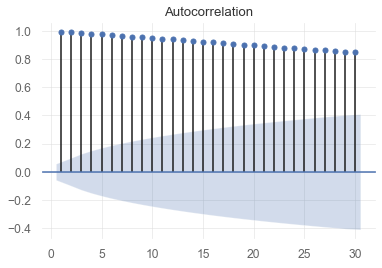

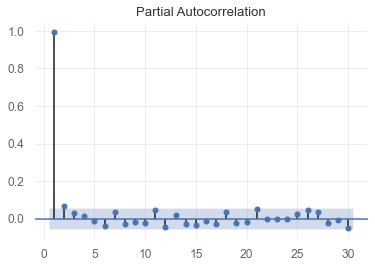

In [76]:
# Run autocorrelation and partial auto correlation analysis


from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Plot the ACF of the `Return price` data with a lag of 30
plot_acf(stock_df[x_reg_var_list][ticker], lags=30, zero=False);
plot_pacf(stock_df[x_reg_var_list][ticker], lags=30, zero=False);

In [77]:
stock_df[x_reg_var_list]

AAPL  daily_return  lagged_return
Date                                               
2016-06-13   22.806034     -0.015076      -0.008229
2016-06-14   22.834148      0.001233      -0.015076
2016-06-15   22.759176     -0.003283       0.001233
2016-06-16   22.855236      0.004221      -0.003283
2016-06-17   22.335106     -0.022758       0.004221
...                ...           ...            ...
2021-01-14  128.910004     -0.015127       0.016227
2021-01-15  127.139999     -0.013731      -0.015127
2021-01-19  127.830002      0.005427      -0.013731
2021-01-20  132.029999      0.032856       0.005427
2021-01-21  135.839996      0.028857       0.032856

[1161 rows x 3 columns]

Per PACF analysis, the first lag seems to be more significant.

In [78]:
from statsmodels.tsa.arima_model import ARMA

# Estimate and ARMA model using statsmodels (use order=(2, 1))
ARMA_model = ARMA(stock_df[x_reg_var_list]["daily_return"].values,order=(2,1))
# Fit the model and assign it to a variable called results
ARMA_results = ARMA_model.fit()

# Output model summary results:
ARMA_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 1161
Model:                     ARMA(2, 1)   Log Likelihood                2953.773
Method:                       css-mle   S.D. of innovations              0.019
Date:                Thu, 21 Jan 2021   AIC                          -5897.546
Time:                        10:20:55   BIC                          -5872.260
Sample:                             0   HQIC                         -5888.005
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0017      0.000      3.435      0.001       0.001       0.003
ar.L1.y       -0.2886      0.759     -0.380      0.704      -1.775       1.198
ar.L2.y       -0.0093      0.106     -0.087      0.930      -0.218       0.199
ma.L1.y        0.1573      0.758      0.207      0.836      -1.328       1.643
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -3.9734           +0.0000j            3.9734            0.5000
AR.2          -27.1108           +0.0000j           27.1108            0.5000
MA.1           -6.3590           +0.0000j            6.3590            0.5000
-----------------------------------------------------------------------------
"""

In [79]:
# Plot the 20 Day Returns Forecast
ARMA_prediction_df=pd.DataFrame(ARMA_results.forecast(steps=20)[0]).rename(columns={0: ticker+ " Return"})
ARMA_prediction_graph=ARMA_prediction_df.hvplot(title="ARMA Return Forecast for The next 20 Days for " + ticker ).opts(yformatter="%.3f")
ARMA_prediction_graph

:Curve   [index]   (AAPL Return)

### TO BE REVISED
Question: Based on the p-value, is the model a good fit?

Answer: It appears that lag(2) has p-value > 0.05, indicating an insignificant statistical result. AIC and BIC for ARMA(2,1) are 19513.955 and 19548.846 respectively, which is a little bit higher than ARMA(1,1)'s AIC of 19512.224 and BIC of 19540.136. Thus, it is believed that removal of lag(2) would perform a more accurate prediction.

### Prediction 5 - Forecasting Returns using an ARIMA Model

In [80]:
from statsmodels.tsa.arima_model import ARIMA

# Estimate and ARIMA Model(P,D,Q)
#P= # of Auto-Regressive Lags, D= # of Differences (this is usually =1), Q= # of Moving Average Lags
ARIMA_model = ARIMA(stock_df[x_reg_var_list][ticker], order=(5, 1, 1))

# Fit the model
ARIMA_results=ARIMA_model.fit()

# Output model summary results:
ARIMA_results.summary()

C:\Users\rodig\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\rodig\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D.AAPL   No. Observations:                 1160
Model:                 ARIMA(5, 1, 1)   Log Likelihood               -1989.954
Method:                       css-mle   S.D. of innovations              1.345
Date:                Thu, 21 Jan 2021   AIC                           3995.909
Time:                        10:20:56   BIC                           4036.358
Sample:                             1   HQIC                          4011.171
                                                                              
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0970      0.036      2.708      0.007       0.027       0.167
ar.L1.D.AAPL    -1.0053      0.089    -11.270      0.000      -1.180      -0.830
ar.L2.D.AAPL    -0.0972      0.044     -2.232      0.026      -0.183      -0.012
ar.L3.D.AAPL     0.0023      0.042      0.054      0.957      -0.081       0.085
ar.L4.D.AAPL    -0.0275      0.042     -0.649      0.516      -0.110       0.055
ar.L5.D.AAPL     0.0456      0.038      1.193      0.233      -0.029       0.120
ma.L1.D.AAPL     0.8882      0.085     10.390      0.000       0.721       1.056
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.2709           -0.2887j            1.3033           -0.4644
AR.2           -1.2709           +0.2887j            1.3033            0.4644
AR.3            0.2673           -2.2085j            2.2246           -0.2308
AR.4            0.2673           +2.2085j            2.2246            0.2308
AR.5            2.6099           -0.0000j            2.6099           -0.0000
MA.1           -1.1258           +0.0000j            1.1258            0.5000
-----------------------------------------------------------------------------
"""

In [81]:
# Plot the 20 Day Price Forecast 
ARIMA_prediction_df=pd.DataFrame(ARIMA_results.forecast(steps=20)[0]).rename(columns={0: ticker+ " Price"})
ARIMA_prediction_graph=ARIMA_prediction_df.hvplot(title="ARIMA Price Forecast for The next 20 Days for " + ticker )
ARIMA_prediction_graph

:Curve   [index]   (AAPL Price)

### TO BE REVISED
Question: What does the model forecast will happen to the Japanese Yen in the near term?

Answer: It appears in the next 5 days, Japanese Yen will be appreciating against Canadian Dolloar from 80.70 to 80.62, per ARIMA(5, 1, 1) model. However, the coefficients in such ARIMA model are statistically insignificant at 5%. Only AR-lag(1), AR-lag(5), and MA-lag(1) are statistically significant at 10%, indicating that the ARIMA(5, 1, 1) model performance would not be that statistically accurate.

### Prediction 6 - Volatility Forecasting with GARCH

In [82]:
from arch import arch_model

In [83]:
# Estimate a GARCH model:
arch_model = arch_model(stock_df[x_reg_var_list]["daily_return"], mean="Zero", vol = "GARCH", p=2, q=1)
# Fit the model
arch_results=arch_model.fit()
#results=model.fit(disp="off")

Iteration:      1,   Func. Count:      5,   Neg. LLF: -3116.411486984509
Optimization terminated successfully    (Exit mode 0)
            Current function value: -3116.411487622221
            Iterations: 5
            Function evaluations: 5
            Gradient evaluations: 1


C:\Users\rodig\anaconda3\lib\site-packages\arch\univariate\base.py:292: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003677. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


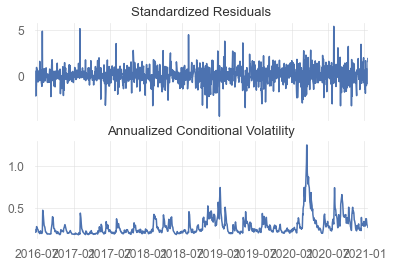

In [84]:
arch_results_fig = arch_results.plot(annualize='D')

In [85]:
# Summarize the model results
arch_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:           daily_return   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                      GARCH   Log-Likelihood:                3116.41
Distribution:                  Normal   AIC:                          -6224.82
Method:            Maximum Likelihood   BIC:                          -6204.59
                                        No. Observations:                 1161
Date:                Thu, Jan 21 2021   Df Residuals:                     1157
Time:                        10:20:59   Df Model:                            4
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      3.7061e-05  4.624e-06      8.015  1.104e-15 [2.800e-05,4.612e-05]
alpha[1]       0.1000  4.584e-02      2.182  2.914e-02   [1.016e-02,  0.190]
alpha[2]       0.1000  5.325e-02      1.878  6.041e-02  [-4.377e-03,  0.204]
beta[1]        0.7000  2.865e-02     24.435 7.286e-132     [  0.644,  0.756]
============================================================================

Covariance estimator: robust
"""

In [86]:
# Find the last day of the dataset
last_day = stock_df[x_reg_var_list][ticker].index.max().strftime('%Y-%m-%d')
last_day

'2021-01-21'

In [87]:
# Create a 5 day forecast of volatility
forecast_horizon = 5

# Start the forecast using the last_day calculated above
# If forecast horizon is 5, then the resulting 'h.1'~'h.5' are the forecasts for the following 5 days
forecasts_volatility = arch_results.forecast(start=last_day, horizon=forecast_horizon)
forecasts_volatility

In [88]:
# Annualize the forecast
intermediate_volatility = np.sqrt(forecasts_volatility.variance.dropna() * 252)
intermediate_volatility.head()
# Transpose the forecast so that it is easier to plot
final_volatility = intermediate_volatility.dropna().T
final_volatility.head()

Date  2021-01-21
h.1     0.343961
h.2     0.353513
h.3     0.348062
h.4     0.344608
h.5     0.341259

In [89]:
# Plot the final forecast
final_volatility.hvplot(title= ticker + ' Volatility Forecast for the next 5 days', ylabel ="in% " +"for "+ticker + " starting on " + last_day)

:Curve   [index]   (2021-01-21 00:00:00)

### Create a dashboard

In [90]:
# Create a Title for the Dashboard
title = "# Dashboard for your potential investments"

# Define a welcome text
welcome_text= "### This dashboard presents a visual analysis of investment performance."
# info_text= display_business_summary(stock)

# Create a tab layout for the dashboard
business_text = "#### Business Summary: "+"\n"+display_business_summary(ticker)+"\n"
industry_text = "#### Industry: "+"\n"+display_industry_summary(ticker)
sector_text = "#### Sector: "+"\n"+display_sector_summary(ticker)


# Tab1
welcome_tab = pn.Column(welcome_text, 
                        pn.Row(industry_text, sector_text), 
                        business_text,
                        pn.Column(interactive_period, interact[1], display_info(ticker))
                       )
# Tab2
return_text = "### A brief snapshot of return and volatility over the past 5 years"
return_analysis = pn.Column(return_text,
                        pn.Row(daily_cum_return_graph(), sharpe_graph()),
                        pn.Row(rolling_visual(30),rolling_visual(60)),
                        pn.Row(rolling_visual_ewm(30),rolling_visual_ewm(60)),    
    
                           )

# Tab3
algo_text = "### Uses a computer program that follows some criteria to identifiy trends and point in the recommendations"
algo_analysis = pn.Column(algo_text,
                          pn.Row("SMA Strategy", algo_chart),
                          pn.Row("EMA Strategy", ema_close),
                          pn.Row("Bollinger Strategy", bollinger)
                          
                         )
# Tab3
prediction_text = "### Below is the prediction applying machine learning techniques"
prediction_analysis = pn.Column(prediction_text,
                                last_10_record_random_forest,
                                Cumulative_Returns_Random_Forest_Model,
                                LTSM_model_price_prediction_bollinger_std,
                                linear_regression_graph,
                                ARMA_prediction_graph,
                                ARIMA_prediction_graph
                         )



In [91]:
dashboard = pn.Column(
    title, pn.Tabs(
        (
            "Welcome",
            welcome_tab
        ),
        (
            "Return and volatility metrics",
            return_analysis
        ),
        (
            "Algo Trading Strategy",
            algo_analysis
        ),
        (
            "Prediction with ML techniquies",
            prediction_analysis
        ),

  
))

dashboard

Column
    [0] Markdown(str)
    [1] Tabs
        [0] Column
            [0] Markdown(str)
            [1] Row
                [0] Markdown(str)
                [1] Markdown(str)
            [2] Markdown(str)
            [3] Column
                [0] Markdown(str)
                [1] Row
                    [0] Column
                        [0] Column
                            [0] Select(name='window_size', options=['5y', '10y', ...], value='5y')
                            [1] TextInput(name='my_ticker', value='AAPL')
                        [1] Row
                            [0] HoloViews(Curve, name='interactive01454')
                [2] DataFrame(DataFrame)
        [1] Column
            [0] Markdown(str)
            [1] Row
                [0] HoloViews(NdOverlay)
                [1] HoloViews(Bars)
            [2] Row
                [0] HoloViews(NdOverlay)
                [1] HoloViews(NdOverlay)
            [3] Row
                [0] HoloViews(NdOverlay)
                [1] HoloViews(NdOverlay)
        [2] Column
            [0] Markdown(str)
            [1] Row
                [0] Markdown(str)
                [1] HoloViews(Overlay)
            [2] Row
                [0] Markdown(str)
                [1] HoloViews(NdOverlay)
            [3] Row
                [0] Markdown(str)
                [1] HoloViews(NdOverlay)
        [3] Column
            [0] Markdown(str)
            [1] HoloViews(NdOverlay)
            [2] HoloViews(Curve)
            [3] HoloViews(NdOverlay)
            [4] HoloViews(NdOverlay)
            [5] HoloViews(Curve)
            [6] HoloViews(Curve)

### Execute the servable function

### Others - other graphs and metric with new library

In [92]:
%matplotlib inline
import quantstats as qs
# extend pandas functionality with metrics, etc.
qs.extend_pandas()

In [93]:
# fetch the daily returns for a stock
stock_qs = qs.utils.download_returns(ticker)

                    Strategy
------------------  -----------
Start Period        1980-12-12
End Period          2021-01-21
Risk-Free Rate      0.0%
Time in Market      97.0%

Cumulative Return   134,097.52%
CAGR%               19.65%
Sharpe              0.63
Sortino             0.91
Max Drawdown        -81.8%
Longest DD Days     3074

Payoff Ratio        1.06
Profit Factor       1.12
Common Sense Ratio  1.25
CPC Index           0.61
Tail Ratio          1.11
Outlier Win Ratio   4.1
Outlier Loss Ratio  3.59

MTD                 2.24%
3M                  15.64%
6M                  40.35%
YTD                 2.24%
1Y                  72.89%
3Y (ann.)           46.74%
5Y (ann.)           43.28%
10Y (ann.)          29.44%
All-time (ann.)     19.65%

Avg. Drawdown       -6.54%
Avg. Drawdown Days  63
Recovery Factor     1639.3
Ulcer Index         inf


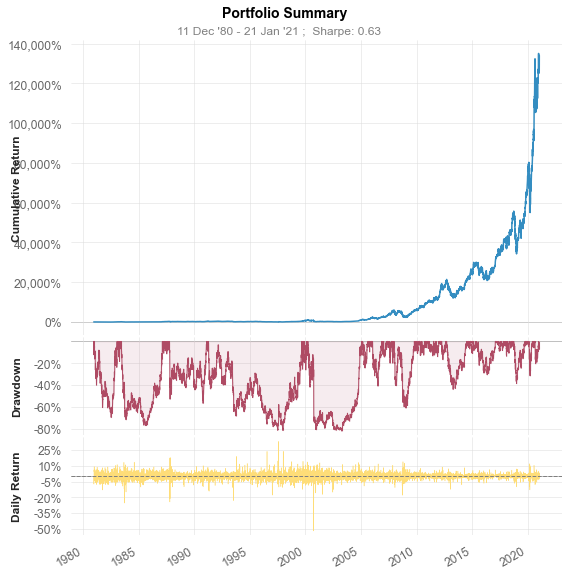

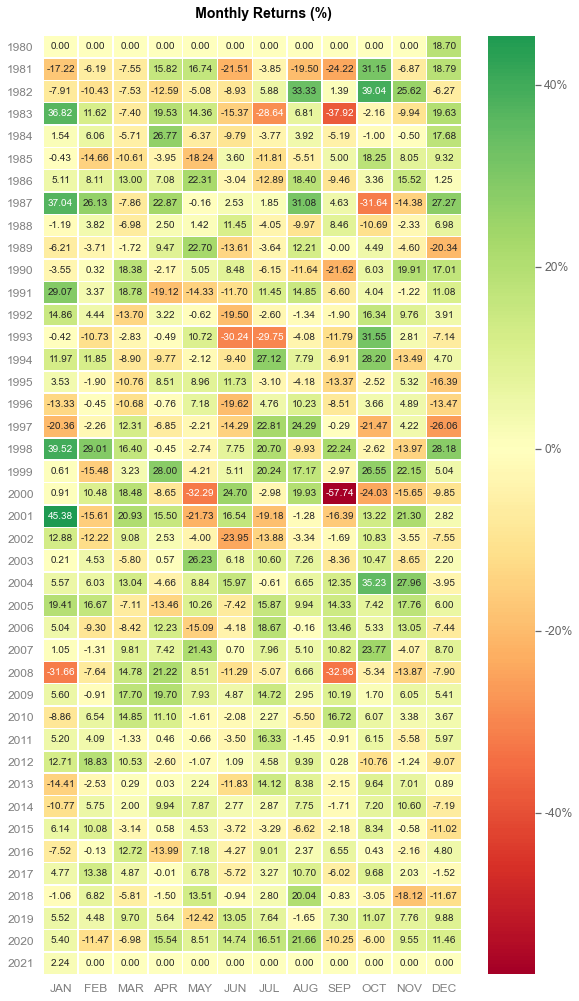

In [94]:
# Create a basic metric report
qs.reports.basic(stock_qs)

In [95]:
# Define function for specific ticker symbol- tab 2
def monthly_heatmap(qs_symbol):
    """Monthly Return Graph"""
    monthly_heatmap_fig= qs.plots.monthly_heatmap(qs_symbol)
    return monthly_heatmap_fig
def distribution(qs_symbol):
    """ Return Quantiles"""
    distribution_fig=qs.plots.distribution(qs_symbol)
    return distribution_fig
def rolling_beta(qs_symbol):
    """ Return rolling beta 6 month"""
    rolling_beta_fig= qs.plots.rolling_beta(qs_symbol, "SPY")
    return rolling_beta_fig
def rolling_volatility(qs_symbol):
    """ Return rolling volatility 6 month"""
    rolling_volatility_fig=qs.plots.rolling_volatility(qs_symbol)
    return rolling_volatility_fig

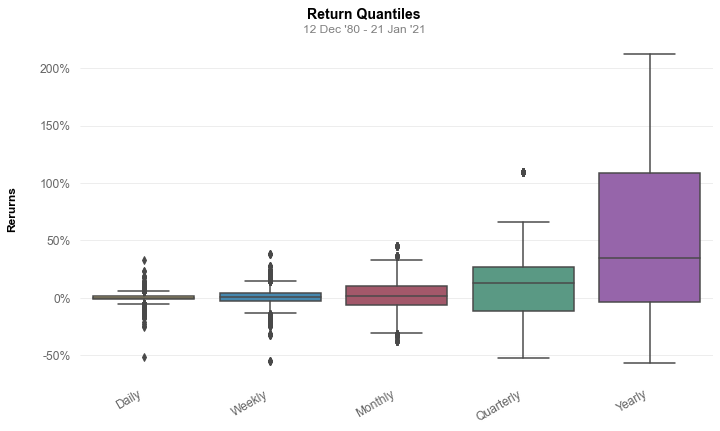

In [96]:
distribution(stock_qs)

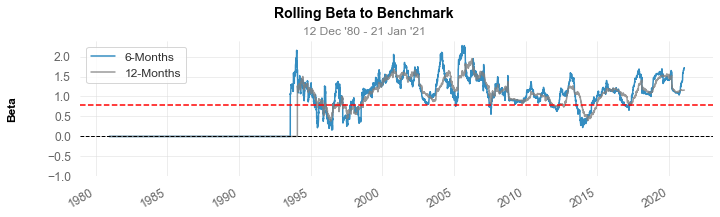

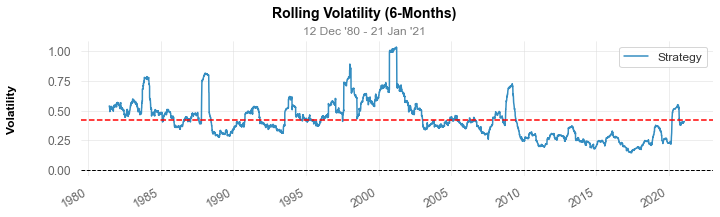

In [97]:
rolling_beta(stock_qs) 
rolling_volatility(stock_qs)

### Reference

1. https://github.com/ranaroussi/quantstats
2. 